In [35]:
import os
import random
import glob
import torch
import torchvision
import torchaudio

import numpy as np
from scipy import signal
from scipy.fftpack import fft
from scipy.io import wavfile
import matplotlib.pyplot as plt
import librosa

In [30]:
print(librosa.__version__)
print(matplotlib.__version__)
print(torchaudio.__version__)
print(torch.__version__)
print(torchvision.__version__)

0.9.2
3.6.1
0.12.1+rocm5.1.1
1.12.1+rocm5.1.1
0.13.1+rocm5.1.1


In [32]:
DATA_PATH = "../data"

In [33]:
def spectrogram(data, sample_rate):

    window_size = 20
    step_size = 10
    eps = 1e-10

    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(data, fs=sample_rate, window='hann',
                                            nperseg=nperseg, noverlap=noverlap, detrend=False)
    
    spec = np.log(spec.T.astype(np.float32) + eps)
    plt.imshow(spec, aspect='auto', origin='lower', 
            extent=[times.min(), times.max(), freqs.min(), freqs.max()])
    
    return spec

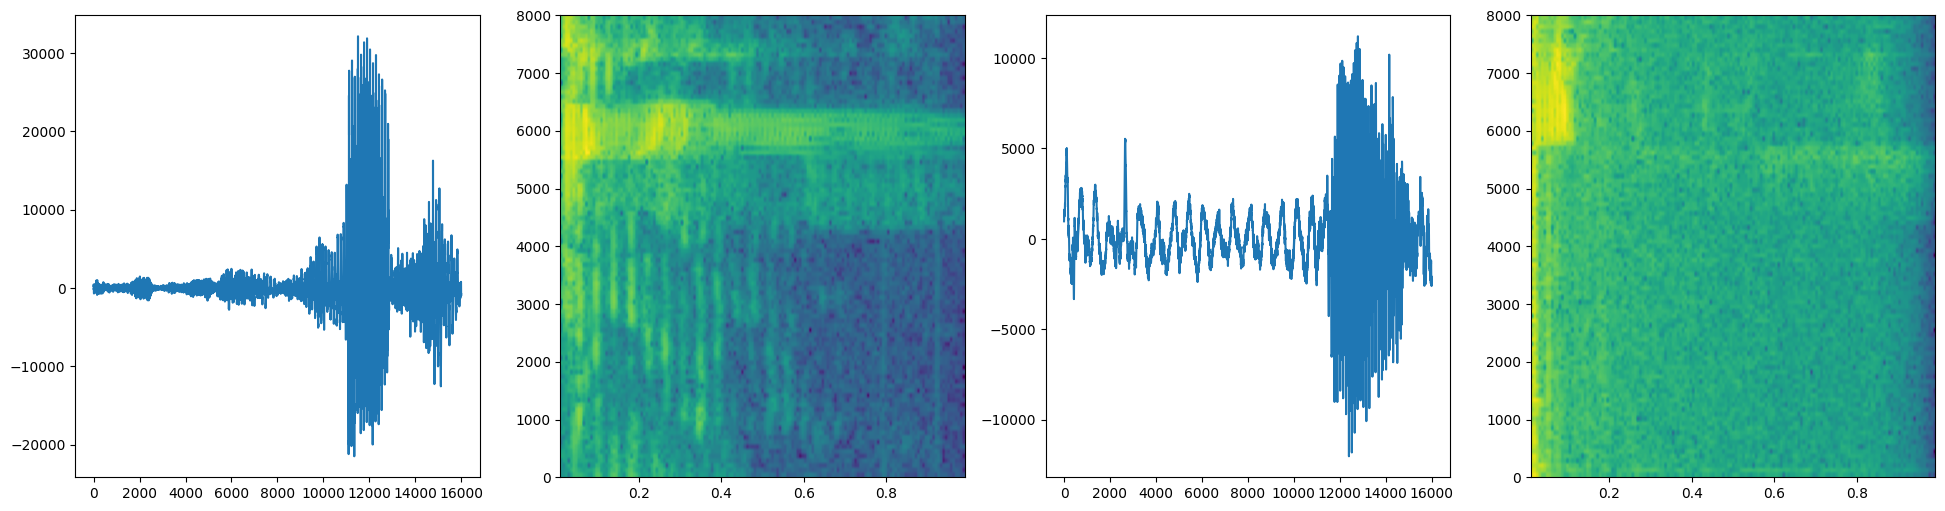

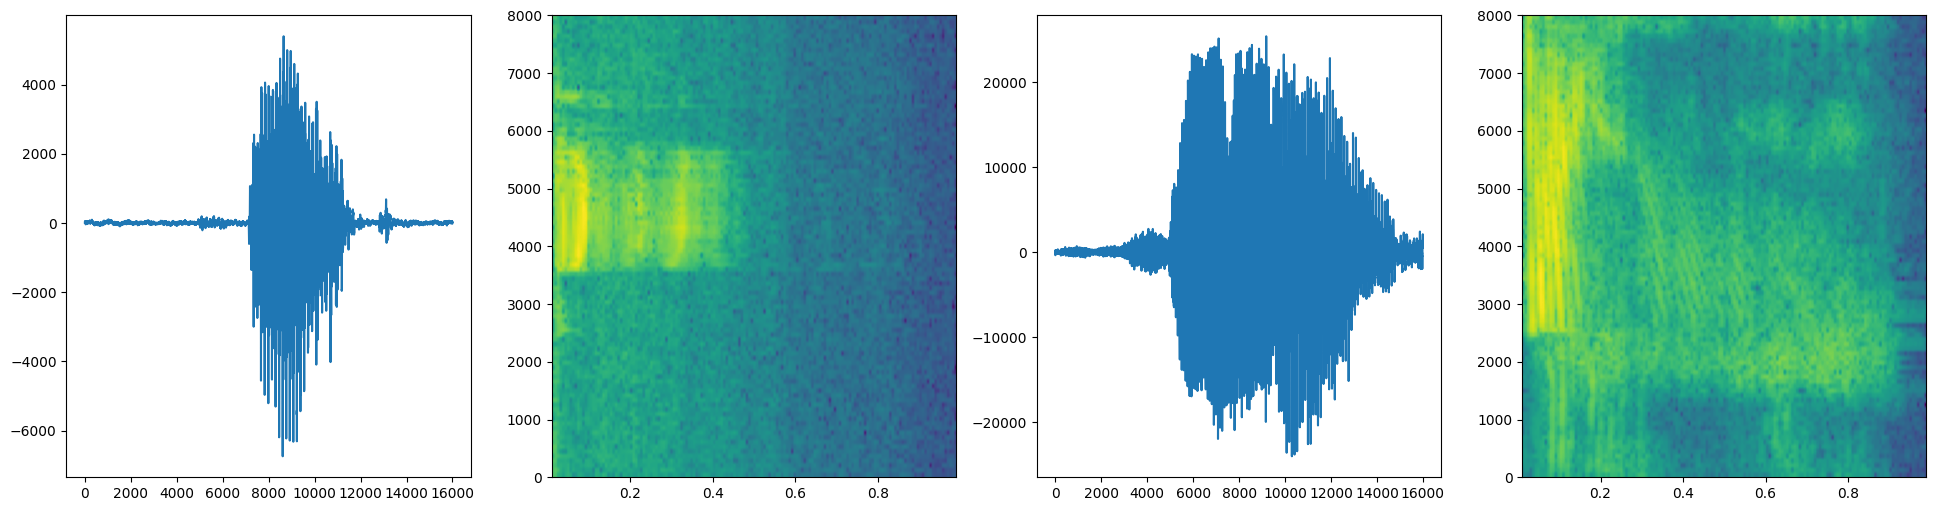

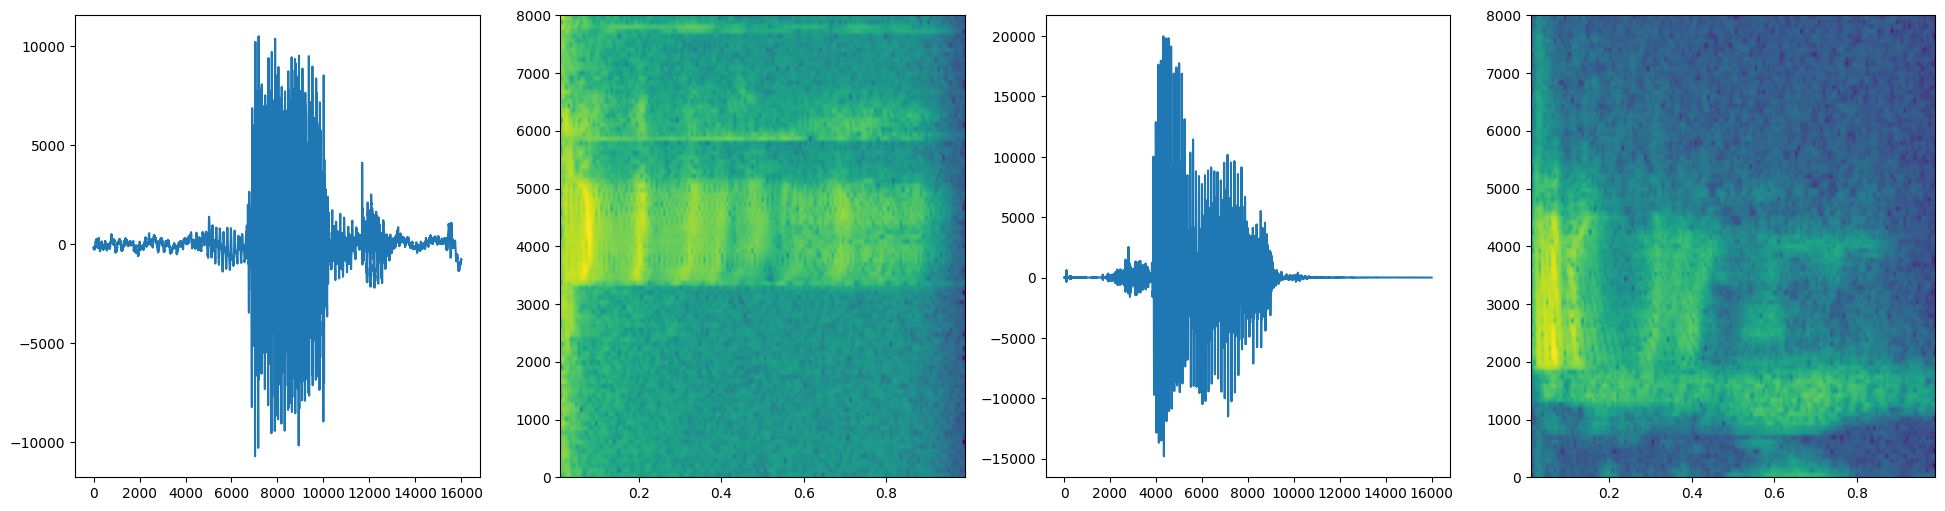

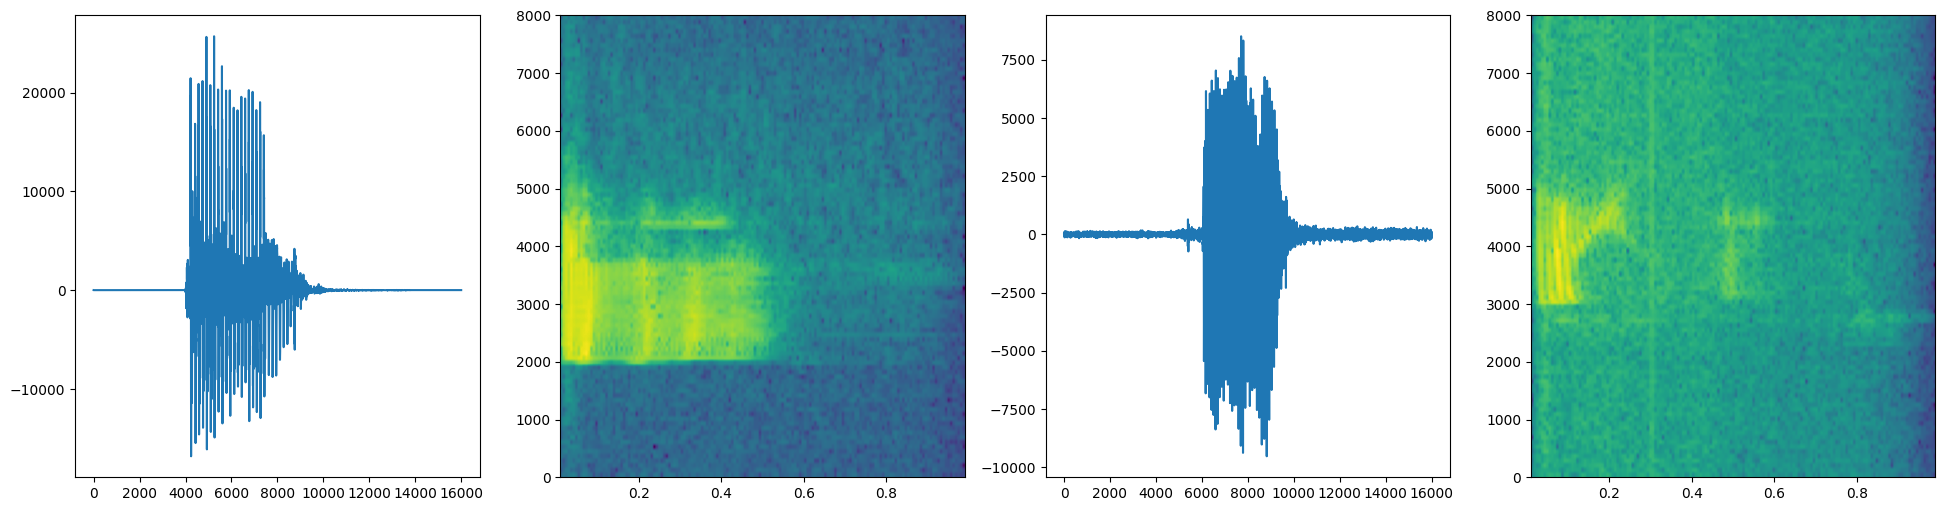

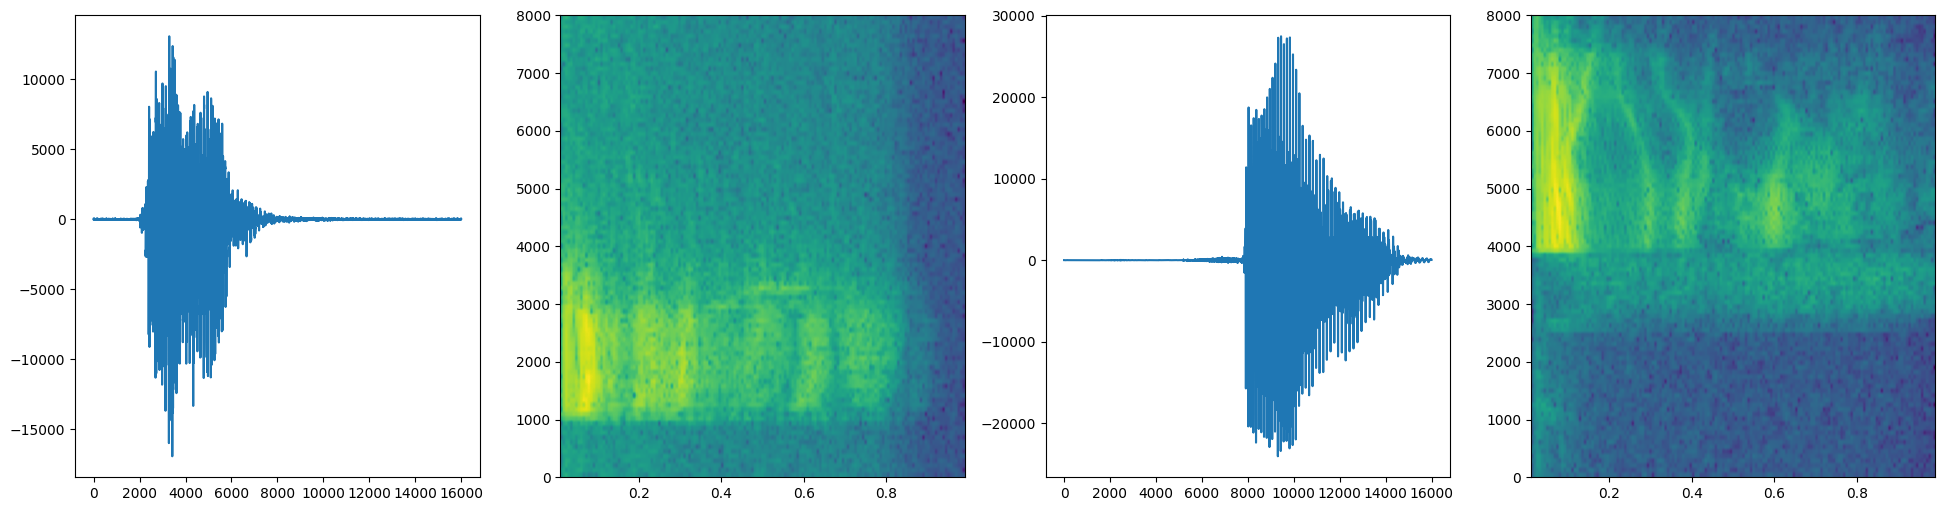

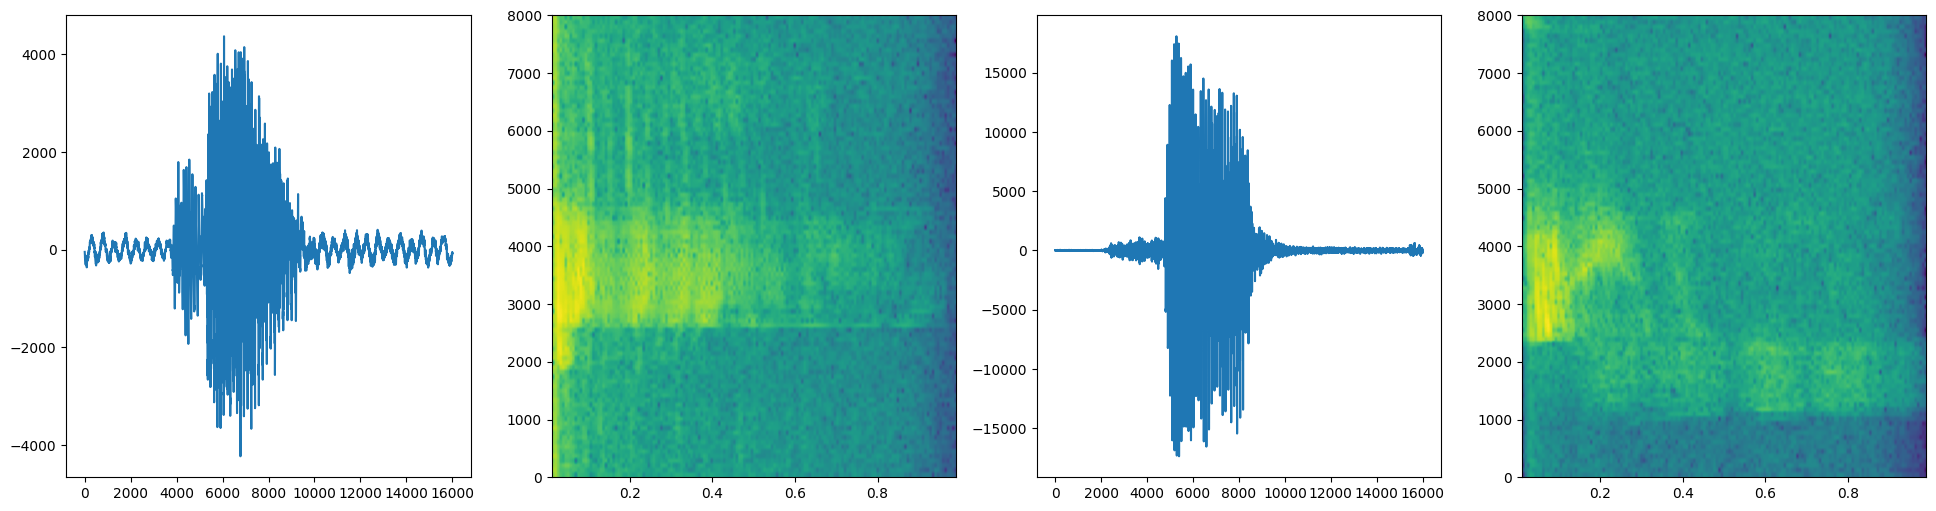

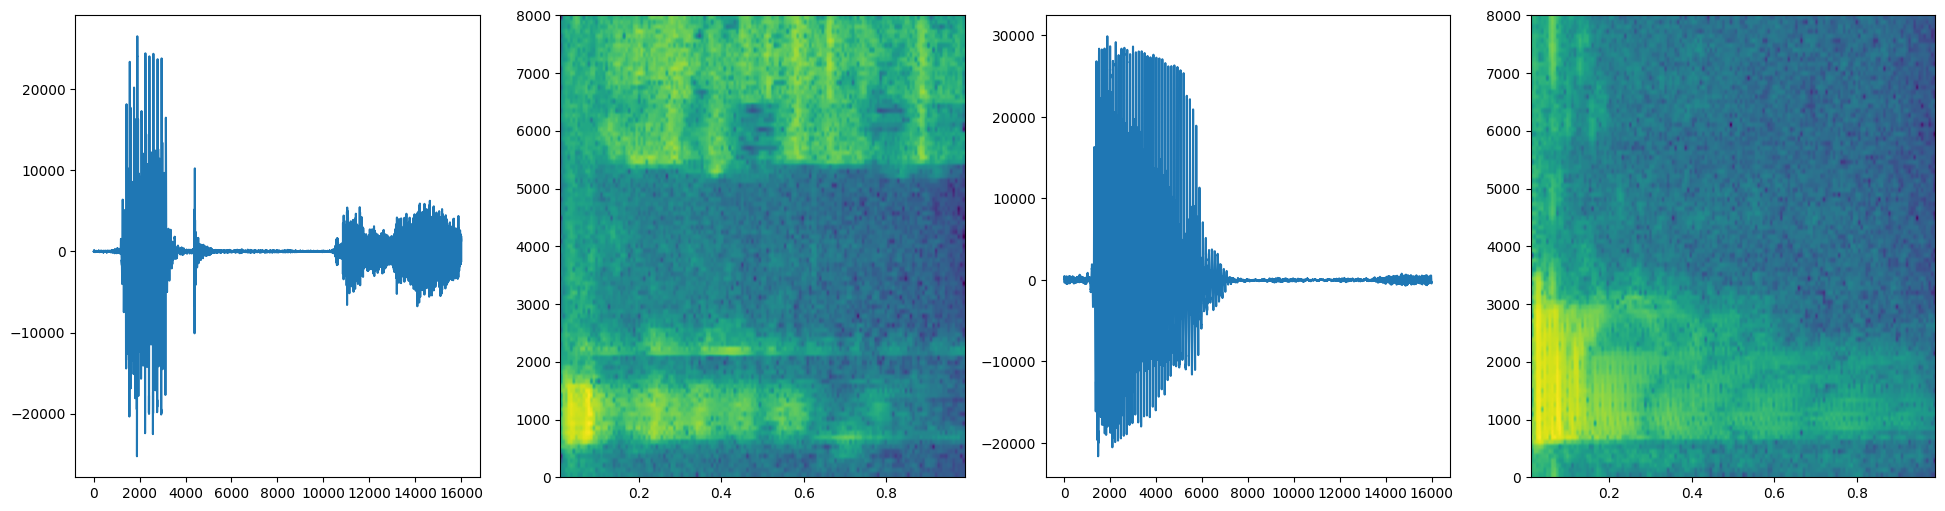

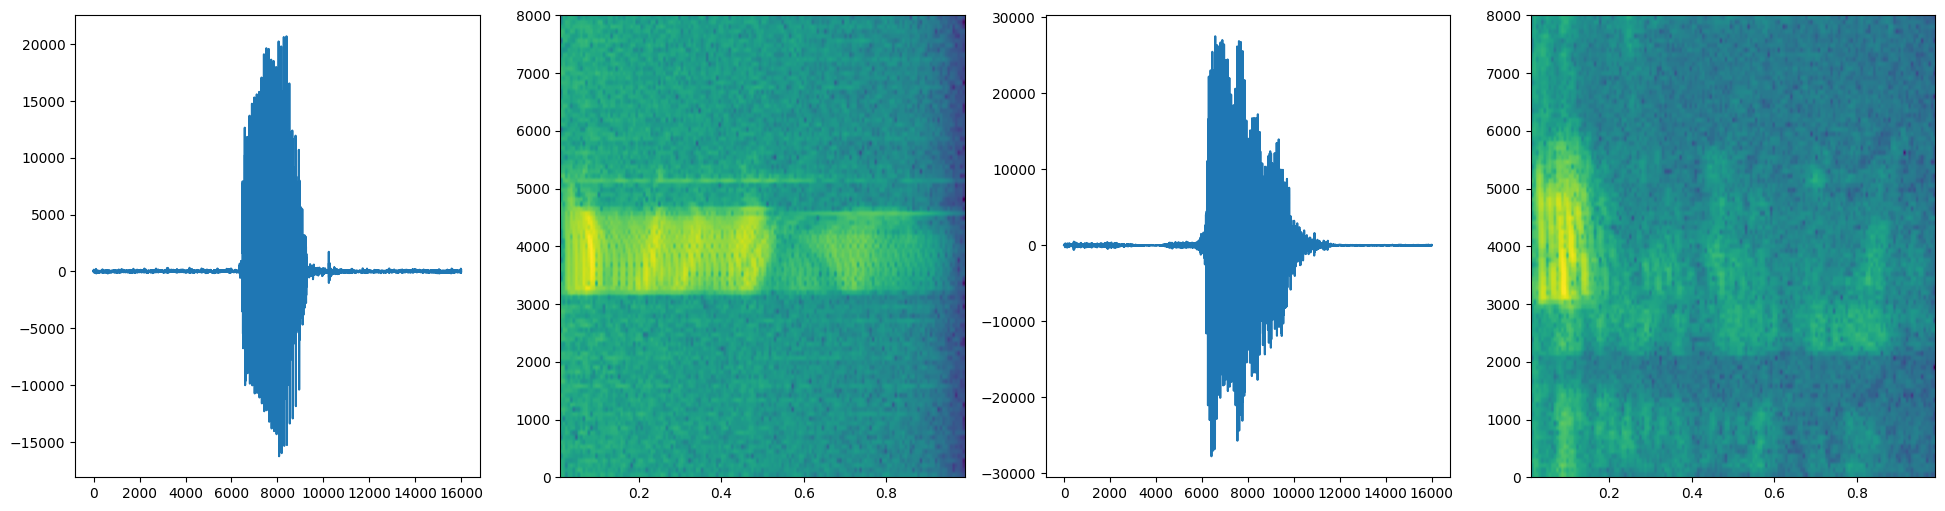

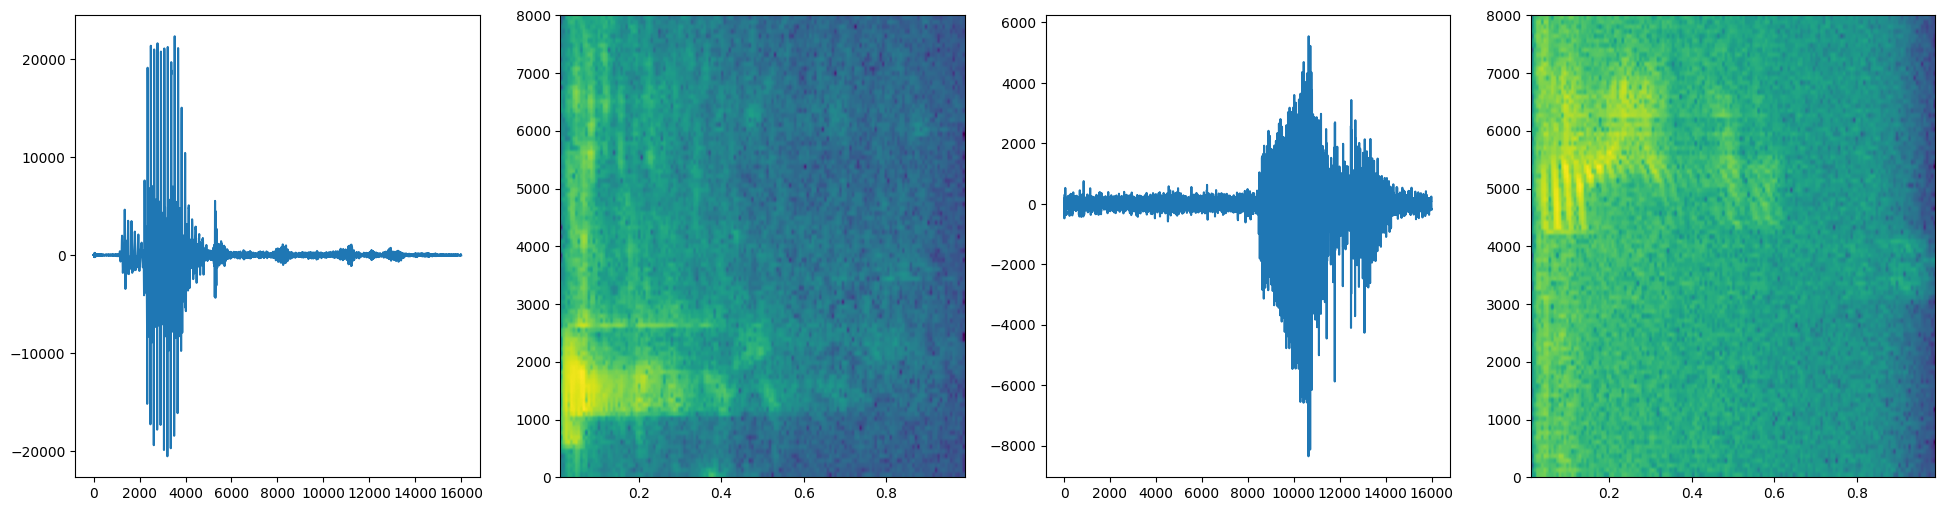

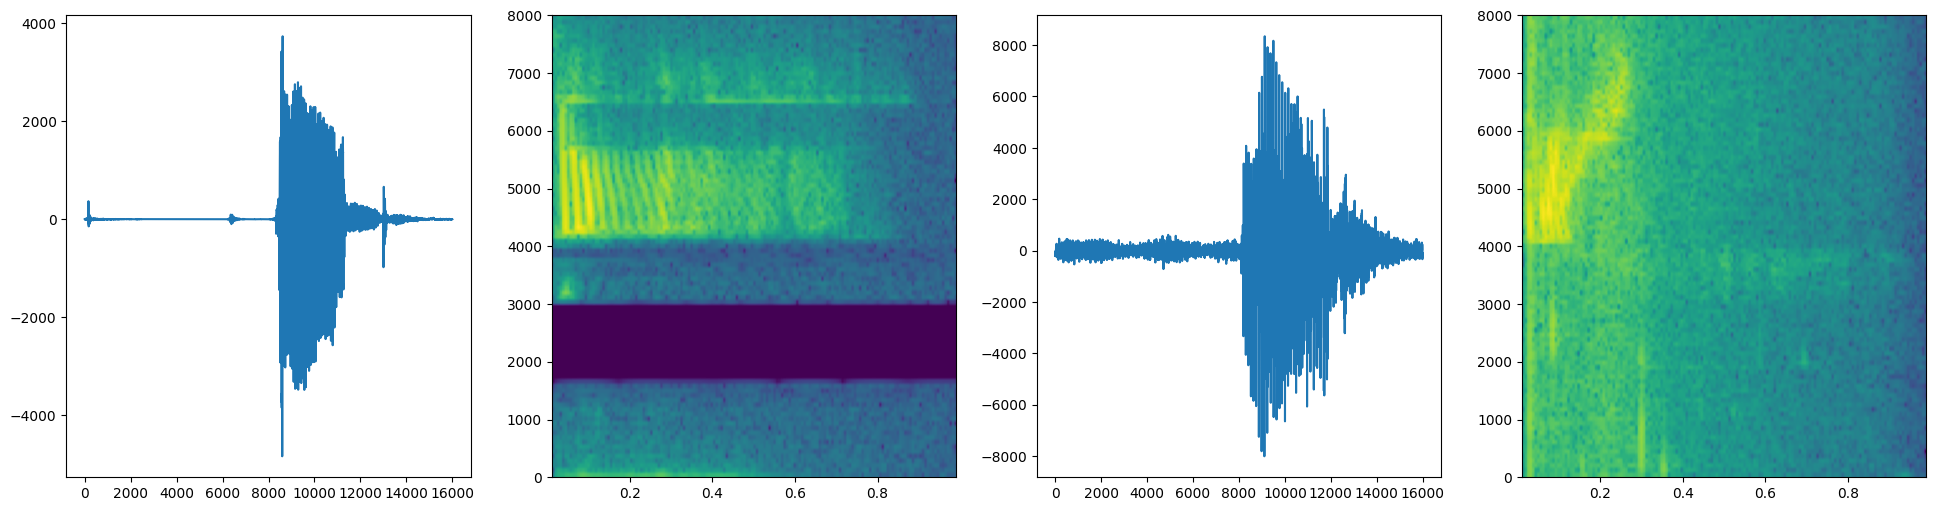

In [37]:
#bed_list = os.listdir(os.path.join(DATA_PATH, "train", "audio", "bed"))
bed_list = glob.glob(os.path.join(DATA_PATH, "train", "audio", "bed", "*.wav"))
four_list = glob.glob(os.path.join(DATA_PATH, "train", "audio", "four", "*.wav"))
for _ in range(10):
    plt.figure(figsize = (24, 6))
    sample_idx = random.randint(0, len(bed_list)-1)
    sample = wavfile.read(bed_list[sample_idx])
    sample_rate, data = sample
    plt.subplot(1,4,1)
    plt.plot(data)
    plt.subplot(1,4,2)
    spectrogram(data, sample_rate)
    
    sample_idx = random.randint(0, len(four_list)-1)
    sample = wavfile.read(four_list[sample_idx])
    sample_rate, data = sample
    plt.subplot(1,4,3)
    plt.plot(data)

    plt.subplot(1,4,4)
    spectrogram(data, sample_rate)
    plt.show()

In [45]:
silence_paths = os.listdir(os.path.join(DATA_PATH, "train", "audio",
                                        "_background_noise_"))
silence_files = [file for file in silence_paths if file.endswith(".wav")]

In [55]:
for file in silence_files:
    sig, sr = librosa.load(os.path.join(DATA_PATH, "train", "audio",
                                        "_background_noise_",file), sr = 16000)
    print(len(sig))
    sample = wavfile.read(os.path.join(DATA_PATH, "train", "audio",
                                        "_background_noise_",file))
    print(sample[0])

1522930
16000
988891
16000
980062
16000
960000
16000
978488
16000
960000
16000


/tmp/ipykernel_628/4254468654.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample = wavfile.read(os.path.join(DATA_PATH, "train", "audio",


In [49]:
for file in silence_files:
    sample = wavfile.read(os.path.join(DATA_PATH, "train", "audio",
                                        "_background_noise_", file))
    print(sample[0])

16000
16000
16000
16000
16000
16000


/tmp/ipykernel_628/3929318544.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample = wavfile.read(os.path.join(DATA_PATH, "train", "audio",


In [13]:
from pathlib import Path
datapath = Path("../") / "data"
with open(str(datapath/"train"/"validation_list.txt"), "r", encoding = "utf-8") as f:
    lines = f.readlines()
    val_file_list = [line.rstrip() for line in lines]
    print("No val files:",len(val_file_list))
    print(val_file_list[:5])

No val files: 6798
['bed/026290a7_nohash_0.wav', 'bed/060cd039_nohash_0.wav', 'bed/060cd039_nohash_1.wav', 'bed/099d52ad_nohash_0.wav', 'bed/0e17f595_nohash_0.wav']


In [11]:

    
val_classes = set()
for file in val_file_list:
    val_classes.add(file.split("/")[0])
print("No val classes:",len(val_classes))
    
with open(str(datapath/"train"/"testing_list.txt"), "r", encoding = "utf-8") as f:
    lines = f.readlines()
    test_file_list = [line.rstrip() for line in lines]
    print("No test files:",len(test_file_list))
    
test_classes = set()
for file in test_file_list:
    test_classes.add(file.split("/")[0])
print("No test classes:",len(test_classes))

print("Total number of val and test files: ", len(val_file_list) + len(test_file_list))
val_test_list = val_file_list + test_file_list

No val files: 6798
No val classes: 30
No test files: 6835
No test classes: 30
Total number of val and test files:  13633


In [12]:
audio_file_list = []
for audio_class in val_classes:
    audio_file_list += os.listdir((datapath/"train"/"audio"/audio_class))
    
print("Total number of .wav files:", len(audio_file_list))

Total number of .wav files: 64721


In [13]:
val_classes

{'bed',
 'bird',
 'cat',
 'dog',
 'down',
 'eight',
 'five',
 'four',
 'go',
 'happy',
 'house',
 'left',
 'marvin',
 'nine',
 'no',
 'off',
 'on',
 'one',
 'right',
 'seven',
 'sheila',
 'six',
 'stop',
 'three',
 'tree',
 'two',
 'up',
 'wow',
 'yes',
 'zero'}

In [41]:
val_file_list

['bed/026290a7_nohash_0.wav',
 'bed/060cd039_nohash_0.wav',
 'bed/060cd039_nohash_1.wav',
 'bed/099d52ad_nohash_0.wav',
 'bed/0e17f595_nohash_0.wav',
 'bed/0e17f595_nohash_1.wav',
 'bed/105e72bb_nohash_0.wav',
 'bed/1657c9fa_nohash_0.wav',
 'bed/16db1582_nohash_0.wav',
 'bed/171b56dc_nohash_0.wav',
 'bed/1942abd7_nohash_0.wav',
 'bed/1a9afd33_nohash_0.wav',
 'bed/1a9afd33_nohash_1.wav',
 'bed/1aed7c6d_nohash_0.wav',
 'bed/1aed7c6d_nohash_1.wav',
 'bed/1bc45db9_nohash_0.wav',
 'bed/23ad12d8_nohash_0.wav',
 'bed/257e17e0_nohash_0.wav',
 'bed/264f471d_nohash_0.wav',
 'bed/27b9a84f_nohash_0.wav',
 'bed/28ef2a01_nohash_0.wav',
 'bed/2a89ad5c_nohash_0.wav',
 'bed/2ce7534c_nohash_0.wav',
 'bed/2ce7534c_nohash_1.wav',
 'bed/364c0853_nohash_0.wav',
 'bed/364c0853_nohash_1.wav',
 'bed/3903b558_nohash_0.wav',
 'bed/3aa6f4e2_nohash_0.wav',
 'bed/3b853f44_nohash_0.wav',
 'bed/3ca784ec_nohash_0.wav',
 'bed/409c962a_nohash_0.wav',
 'bed/409c962a_nohash_1.wav',
 'bed/409c962a_nohash_2.wav',
 'bed/439c

In [42]:
check_count = 0
val_test_list = [file.split("/")[1] for file in val_test_list]
for file_name in audio_file_list:
    if file_name in val_test_list:
        check_count += 1

print(check_count)

13633


In [18]:
from itertools import groupby

num = [2,3,4,5,4,5,6]

gb = groupby(enumerate(num), key = lambda x: x[0]- x[1])
for i in gb:
    print(i)
    key, value = i
    for x in value:
        print(x)

(-2, <itertools._grouper object at 0x7f538621fc10>)
(0, 2)
(1, 3)
(2, 4)
(3, 5)
(0, <itertools._grouper object at 0x7f538621f280>)
(4, 4)
(5, 5)
(6, 6)
